In [94]:
# pip install charmap

In [95]:
import pandas as pd
import json
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [96]:
def save_json_without_escape(filepath, dataframe):
    with open(filepath, 'w', encoding="utf-8") as f:
        json.dump(dataframe.to_dict(orient='records'), f, ensure_ascii=False, indent=4)
        
# Load your dataset
with open('set\Allpackage_298_updateSonar (1).json', 'r', encoding='utf-8') as f:
    data = json.load(f)

df = pd.DataFrame(data)
print("Data loaded successfully.")
print(df.info()) 


Data loaded successfully.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 45 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   project_name                             302 non-null    object 
 1   project_url                              302 non-null    object 
 2   SSF                                      302 non-null    object 
 3   SecurityPolicy_url_endpoint              302 non-null    object 
 4   SecurityPolicy_content                   302 non-null    object 
 5   project_all_labels                       302 non-null    object 
 6   README_content                           302 non-null    object 
 7   num_commits                              302 non-null    int64  
 8   project_age_days                         302 non-null    int64  
 9   project_created_at                       302 non-null    object 
 10  latest_updated_at       

In [97]:
print("Initial NaN count in each feature:")
print(df.isnull().sum())


Initial NaN count in each feature:
project_name                               0
project_url                                0
SSF                                        0
SecurityPolicy_url_endpoint                0
SecurityPolicy_content                     0
project_all_labels                         0
README_content                             0
num_commits                                0
project_age_days                           0
project_created_at                         0
latest_updated_at                          0
latest_pushed_at                           0
num_contributors                           0
num_pull                                   0
num_issues                                 0
num_opening_issue                          0
project_size(kB)                           0
num_stargazers                             0
num_watchers                               0
num_forks                                  0
num_subscribers                            0
SecurityPolicy_creat

In [98]:

df = pd.DataFrame(data)

selected_features = ['num_commits', 'project_age_days', 'num_issues', 'num_pull', 'num_stargazers', 
                     'num_watchers', 'num_forks', 'num_subscribers', 'num_contributors', 'project_size(kB)',
                     'sonarQube_BUG', 'sonarQube_VULNERABILITY', 'sonarQube_CODE_SMELL',
                     'ssf_score', 'ssf0_Binary-Artifacts', 'ssf1_Branch-Protection', 'ssf3_CII-Best-Practices',
                    'ssf7_Dependency-Update-Tool', 'ssf8_Fuzzing', 'ssf9_License',
                     'ssf10_Maintained', 'ssf13_SAST', 'ssf17_Vulnerabilities'
 ]

# selected_features_type
# activeness = 'num_commits', 'project_age_days', 'num_issues', 'num_pull'
# popularity = 'num_stargazers', 'num_watchers', 'num_forks', 'num_subscribers'
# metadata = 'num_contributors', 'project_size(kB)'
# security_practice = 'ssf_score', 'ssf0_Binary-Artifacts', 'ssf1_Branch-Protection', 'ssf3_CII-Best-Practices',
#                    'ssf7_Dependency-Update-Tool', 'ssf8_Fuzzing', 'ssf9_License',
#                     'ssf10_Maintained', 'ssf13_SAST', 'ssf17_Vulnerabilities'
# project_quality = 'sonarQube_BUG', 'sonarQube_VULNERABILITY', 'sonarQube_CODE_SMELL'

# Initialize the MinMaxScaler
scaler = MinMaxScaler()
# Normalize selected features
df[selected_features] = scaler.fit_transform(df[selected_features])


# Categories of interest
categories_of_interest = {"Generic policy", "Reporting mechanism", "Scope of practice", "User guideline"}

splits = {}
for category in categories_of_interest:
    df[f'has_{category.replace(" ", "_").lower()}'] = df['SecurityPolicy_content_category'].apply(
    lambda x: category in x if isinstance(x, list) else False)

    X = df.drop(f'has_{category.replace(" ", "_").lower()}', axis=1)
    y = df[f'has_{category.replace(" ", "_").lower()}']
    
    # Stratified train-test split 70-30
    train_df, temp_df = train_test_split(df, test_size=0.3, stratify=y, random_state=42)

    # Split temp_df into validation and test sets 20-10
    validation_df, test_df = train_test_split(temp_df, test_size=(1/3), stratify=temp_df[f'has_{category.replace(" ", "_").lower()}'], random_state=42)
    
    splits[category] = {"train": train_df, "val": validation_df, "test": test_df}
    
    # Print the counts and distributions for verification
    print(f"Category: {category}\n")
    print("Train dataset:")
    print(train_df[f'has_{category.replace(" ", "_").lower()}'].value_counts(normalize=True))
    print()
    
    print("Validation dataset:")
    print(validation_df[f'has_{category.replace(" ", "_").lower()}'].value_counts(normalize=True))
    print()
    
    print("Test dataset:")
    print(test_df[f'has_{category.replace(" ", "_").lower()}'].value_counts(normalize=True))
    print("-" * 40)

# Save processed data
for category, datasets in splits.items():
    for split_name, dataset in datasets.items():
        save_json_without_escape(f"dataset/{category.replace(' ', '_')}_{split_name}.json", dataset)

print("Data preprocessing complete. JSON files saved.")

Category: Reporting mechanism

Train dataset:
has_reporting_mechanism
True     0.881517
False    0.118483
Name: proportion, dtype: float64

Validation dataset:
has_reporting_mechanism
True     0.883333
False    0.116667
Name: proportion, dtype: float64

Test dataset:
has_reporting_mechanism
True     0.870968
False    0.129032
Name: proportion, dtype: float64
----------------------------------------
Category: Generic policy

Train dataset:
has_generic_policy
True     0.687204
False    0.312796
Name: proportion, dtype: float64

Validation dataset:
has_generic_policy
True     0.683333
False    0.316667
Name: proportion, dtype: float64

Test dataset:
has_generic_policy
True     0.677419
False    0.322581
Name: proportion, dtype: float64
----------------------------------------
Category: User guideline

Train dataset:
has_user_guideline
False    0.853081
True     0.146919
Name: proportion, dtype: float64

Validation dataset:
has_user_guideline
False    0.85
True     0.15
Name: proportion, d

In [99]:
# from collections import Counter

# def read_json(filepath):
#     with open(filepath, 'r', encoding='utf-8') as f:
#         return pd.DataFrame(json.load(f))

# categories_of_interest = {"Generic policy", "Reporting mechanism", "Scope of practice", "User guideline"}

# # Binary encoding for each category
# for category in categories_of_interest:
#     train_df = read_json(f'dataset/{category.replace(' ', '_')}_train.json')
#     validation_df = read_json(f'dataset/{category.replace(' ', '_')}_val.json')
#     test_df = read_json(f'dataset/{category.replace(' ', '_')}_test.json')

# datasets = {"Train": train_df, "Validation": validation_df, "Test": test_df}

# # Process each set
# for dataset_name, dataset in datasets.items():
#     # Total number of packages
#     total_packages = len(dataset)
#     print(f"\n{dataset_name} Dataset: Total Packages = {total_packages}")
    
#     # Count packages for each category
#     category_counts = Counter(
#         category for categories in dataset['SecurityPolicy_content_category'] for category in categories
#     )
#     print(f"Category Counts in {dataset_name} Dataset:")
#     for category, count in category_counts.items():

#         print(f"{category}: {count}")
    

In [100]:
# import pandas as pd
# import numpy as np
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.ensemble import RandomForestClassifier
# from scipy import stats
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Assuming df is your initial DataFrame

# # Identify numeric columns
# numeric_cols = df.select_dtypes(include=[np.number]).columns

# # Step 1: Check for NaNs and Infs in the dataset on numeric columns
# print("Initial NaN values in DataFrame:")
# print(df[numeric_cols].isna().sum())

# print("\nInitial Infinite values in DataFrame:")
# print((np.isinf(df[numeric_cols]).sum()))

# # Step 2: Handling NaNs and Infinite values
# # Replace inf values with NaN in numeric columns
# df[numeric_cols] = df[numeric_cols].replace([np.inf, -np.inf], np.nan)

# # Option to drop rows with any NaN values in numeric columns
# # df.dropna(subset=numeric_cols, inplace=True)

# # Or you could impute missing values (example using median for simplicity)
# for column in numeric_cols:
#     median_value = df[column].median()
#     df[column].fillna(median_value, inplace=True)



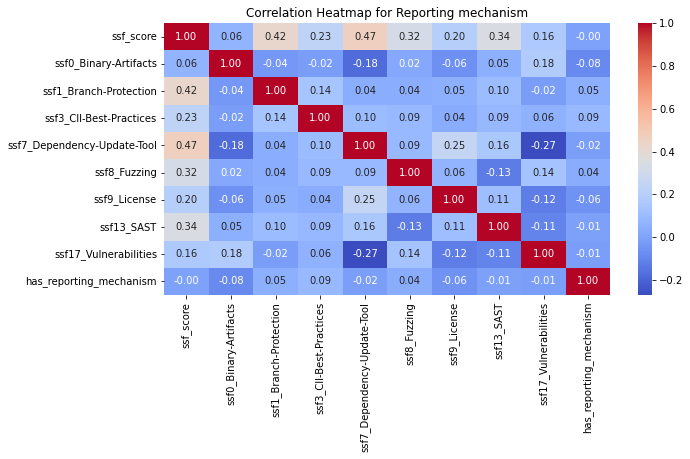

Top Features for Reporting mechanism:

Point biserial:
 ssf_score                     -0.003781
ssf0_Binary-Artifacts         -0.082713
ssf1_Branch-Protection         0.045484
ssf3_CII-Best-Practices        0.087411
ssf7_Dependency-Update-Tool   -0.016276
dtype: float64 

Feature Importance:
 ssf_score                 0.411517
ssf1_Branch-Protection    0.151276
ssf17_Vulnerabilities     0.133474
ssf13_SAST                0.107615
ssf9_License              0.057238
dtype: float64 

--------------------------------------------------


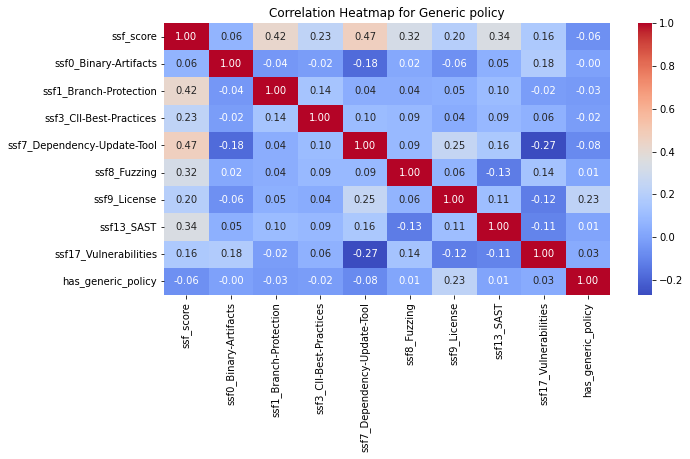

Top Features for Generic policy:

Point biserial:
 ssf_score                     -0.064014
ssf0_Binary-Artifacts         -0.002061
ssf1_Branch-Protection        -0.028331
ssf3_CII-Best-Practices       -0.021365
ssf7_Dependency-Update-Tool   -0.082807
dtype: float64 

Feature Importance:
 ssf_score                 0.393223
ssf1_Branch-Protection    0.151675
ssf17_Vulnerabilities     0.119861
ssf9_License              0.100400
ssf13_SAST                0.091205
dtype: float64 

--------------------------------------------------


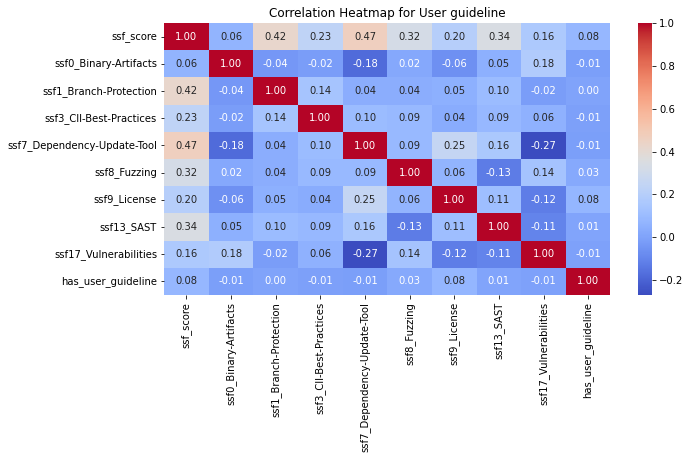

Top Features for User guideline:

Point biserial:
 ssf_score                      0.079696
ssf0_Binary-Artifacts         -0.013440
ssf1_Branch-Protection         0.000503
ssf3_CII-Best-Practices       -0.007390
ssf7_Dependency-Update-Tool   -0.011983
dtype: float64 

Feature Importance:
 ssf_score                 0.395968
ssf1_Branch-Protection    0.166126
ssf17_Vulnerabilities     0.111220
ssf13_SAST                0.109804
ssf0_Binary-Artifacts     0.054322
dtype: float64 

--------------------------------------------------


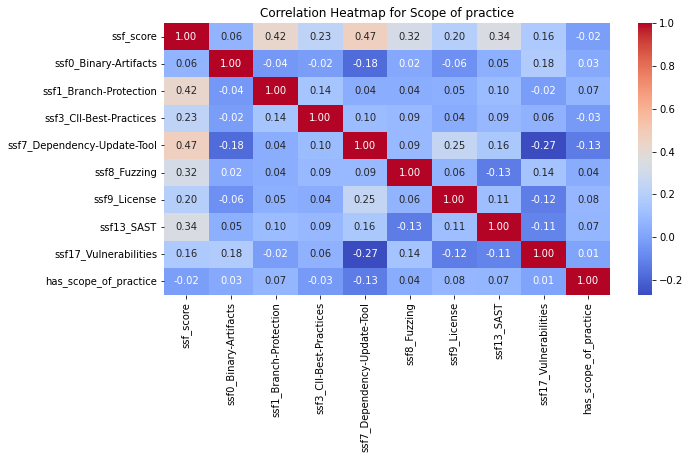

Top Features for Scope of practice:

Point biserial:
 ssf_score                     -0.015984
ssf0_Binary-Artifacts          0.025265
ssf1_Branch-Protection         0.072731
ssf3_CII-Best-Practices       -0.027780
ssf7_Dependency-Update-Tool   -0.128588
dtype: float64 

Feature Importance:
 ssf_score                 0.391420
ssf1_Branch-Protection    0.155279
ssf17_Vulnerabilities     0.112051
ssf13_SAST                0.101247
ssf9_License              0.073934
dtype: float64 

--------------------------------------------------
Feature selection analysis complete.


In [ ]:

from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Normalize selected features
selected_features = ['ssf_score', 'ssf0_Binary-Artifacts', 'ssf1_Branch-Protection', 'ssf3_CII-Best-Practices',
                    'ssf7_Dependency-Update-Tool', 'ssf8_Fuzzing', 'ssf9_License', 'ssf13_SAST', 'ssf17_Vulnerabilities']

# selected_features_type
# activeness = 'num_commits', 'project_age_days', 'num_issues', 'num_pull'
# popularity = 'num_stargazers', 'num_watchers', 'num_forks', 'num_subscribers'
# metadata = 'num_contributors', 'project_size(kB)'
# security_practice = 'ssf_score', 'ssf0_Binary-Artifacts', 'ssf1_Branch-Protection', 'ssf3_CII-Best-Practices',
#                    'ssf7_Dependency-Update-Tool', 'ssf8_Fuzzing', 'ssf9_License',
#                     'ssf10_Maintained', 'ssf13_SAST', 'ssf17_Vulnerabilities'
# project_quality = 'sonarQube_BUG', 'sonarQube_VULNERABILITY', 'sonarQube_CODE_SMELL'


# Assuming df is preprocessed to handle NaNs and infs
scaler = MinMaxScaler()
df[selected_features] = scaler.fit_transform(df[selected_features])

correlation_results = {}
for category in categories_of_interest:
    target_col = f'has_{category.replace(" ", "_").lower()}'
    df[target_col] = df['SecurityPolicy_content_category'].apply(
        lambda x: category in x if isinstance(x, list) else False
    )

    bi_scores = {feature: stats.pointbiserialr(df[feature], df[target_col])[0] for feature in selected_features}

    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    rf.fit(df[selected_features], df[target_col])
    feature_importance = pd.Series(rf.feature_importances_, index=selected_features).sort_values(ascending=False)

    correlation_results[category] = {
        "Biserial": bi_scores,
        "Feature Importance": feature_importance
    }

    plt.figure(figsize=(10, 5))
    sns.heatmap(df[selected_features + [target_col]].corr(), annot=True, cmap='coolwarm', fmt=".2f")
    plt.title(f"Correlation Heatmap for {category}")
    plt.show()

    print(f"Top Features for {category}:\n")
    print("Point biserial:\n", pd.Series(bi_scores).head(5), "\n")
    print("Feature Importance:\n", feature_importance.head(5), "\n")
    print("-" * 50)

print("Feature selection analysis complete.")
